В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Знайомство з даними

# **Завдання 1.** 

Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('cars.csv') 
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


# **Завдання 2.** 
Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
df.shape

(100, 13)

In [5]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [6]:
print('\n',df.Brand.nunique(),'Brand unique values:\n',df.Brand.unique())
print('\n',df.Model.nunique(),'Model unique values:\n',df.Model.unique())
print('\n',df.Year.nunique(),'Year unique values:\n',df.Year.unique())
print('\n',df.Kilometers_Driven.nunique(),'Kilometers_Driven unique values:\n',df.Kilometers_Driven.unique())
print('\n',df.Fuel_Type.nunique(),'Fuel_Type unique values:\n',df.Fuel_Type.unique())
print('\n',df.Transmission.nunique(),'Transmission unique values:\n',df.Transmission.unique())
print('\n',df.Owner_Type.nunique(),'Owner_Type unique values:\n',df.Owner_Type.unique())
print('\n',df.Mileage.nunique(),'Mileage unique values:\n',df.Mileage.unique())
print('\n',df.Engine.nunique(),'Engine unique values:\n',df.Engine.unique())
print('\n',df.Power.nunique(),'Power unique values:\n',df.Power.unique())
print('\n',df.Seats.nunique(),'Seats unique values:\n',df.Seats.unique())
print('\n',df.Price.nunique(),'Price unique values:\n',df.Price.unique())


 11 Brand unique values:
 ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']

 58 Model unique values:
 ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']

 6 Year unique values:
 [2018 2019 2017 2020 2016 2021]

 18 Kilometers_Driven unique values:
 [50000 40000 20000 30000 60000 35000 45000 25000 28000 22000 18000 42000
 32000 38000 24000 26000 15000 10000]

 2 Fuel_Type unique values:
 ['Petrol' 'Diesel']

 2 Transmission unique values:
 ['Manual' 'Automatic']

 3 Owner_Type unique values:
 ['First' 'Seco

In [8]:
df.Price.describe()

count    1.000000e+02
mean     1.574000e+06
std      1.000265e+06
min      4.500000e+05
25%      7.000000e+05
50%      1.300000e+06
75%      2.500000e+06
max      4.000000e+06
Name: Price, dtype: float64

### Conclusion
The dataset with shape (100, 13) has a car_id column, which serves as a unique identifier for each row.
The dataset contains 7 numerical and 5 categorical columns, among which:
- 2 are binary (have only 2 values): `Fuel_Type` and `Transmission` 
- 2 is multicategorical (have more than 2 values) with values that do not have an ordinal relationship: `Brand` and `Model`
- 1 columns have an ordinal relationship (e.g., Small < Medium < Large). - `Owner_Type`

There are no null or missing values.

The average price is 1.574000e+06, and the median is 1.574000e+06

# **Завдання 3**. 

Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Creation of dataset of X inputs features and target y. After that spliting the dataset for train and test
X = df.iloc[:, 0:12]
y = df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# **Завдання 4**. 

Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [11]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [12]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_Code'] = df.Fuel_Type.map(fuel_type_codes)
X_test['Fuel_Type_Code'] = df.Fuel_Type.map(fuel_type_codes)

In [13]:
# Let us check the new column to be sure
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1


(None, None)

In [14]:
# Adding codes for Transmission 
df.Transmission.value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [15]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_Code'] = df.Transmission.map(transmission_codes)
X_test['Transmission_Code'] = df.Transmission.map(transmission_codes)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0


(None, None)

In [16]:
# One hot encoding for Brand column
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [17]:
one_hot = enc.transform(X_train[['Brand']]).toarray()
one_hot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.

In [18]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [19]:
X_train[enc.categories_[0]] = one_hot
X_train

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,Mahindra,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,28,BMW,X3,2019,22000,Diesel,Automatic,Second,18,1995,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
one_hot = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = one_hot
X_test

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,32,Hyundai,Elantra,2017,32000,Diesel,Automatic,Second,22,1582,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,90,Hyundai,Venue,2018,32000,Petrol,Manual,Third,17,1197,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,16,Honda,City,2017,42000,Diesel,Manual,Second,25,1498,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,22,Ford,Figo,2020,15000,Petrol,Manual,Third,18,1194,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,61,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [22]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

## Extra practice with encoding categorical values

In [24]:
# Adding model_class_codes due to budget class
model_class_codes = {
    'Corolla': 0, 'Civic': 0, 'Swift': 0, 'Polo': 0, 'Aspire': 0, 
    'Figo': 0, 'Altroz': 0, 'Santro': 0, 'Tiago': 0, 'Yaris': 0, 
    
    'Tigor': 0, 'Ameo': 0, 'Sonata': 1, 'Nexon': 1, 'Passat': 1,
    'Scorpio': 1, 'City': 1, 'Verna': 1, 'Creta': 1, 'Innova': 1,
    'Harrier': 1, 'Ertiga': 1, 'Tiguan': 1, 'Thar': 1, 
    'Safari': 1, 'Vitara': 1, 'WR-V': 1, 'S-Cross': 1, 
    'BR-V': 1, 'Venue': 1, 'XUV300': 1, 'Vento': 1, 
    'Elantra': 1, 'Camry': 1, 'Innova Crysta': 1, 
    
    'EcoSport': 1, 'Mustang': 2, 'A4': 2, 'X1': 2, 'Ranger': 2, 'GLA': 2, 
    'C-Class': 2, 'Endeavour': 2, 'Q3': 2, '5 Series': 2, 
    'GLC': 2, 'A6': 2, 'X3': 2, 'E-Class': 2, 
    'Fortuner': 2, 'A3': 2, 'A5': 2, '3 Series': 2, 
    'Q7': 2, 'X5': 2, '7 Series': 2, 'GLE': 2, 'T-Roc': 2
}

X_train['Model_Class_Codes'] = df.Model.map(model_class_codes)
X_test['Model_Class_Codes'] = df.Model.map(model_class_codes)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Class_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Class_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0


(None, None)

# **Завдання 5.** 
Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [25]:
numeric_columns = X_train.select_dtypes(include=['number'])
print(numeric_columns.head())

    Car_ID  Year  Kilometers_Driven  Mileage  Engine  Power  Seats  \
83      84  2019              22000       18    1498    148      5   
55      56  2018              28000       17    1968    187      5   
26      27  2018              28000       15    1984    241      5   
54      55  2017              32000       18    1598    103      5   
19      20  2017              26000       12    1991    241      5   

    Fuel_Type_Code  Transmission_Code  Audi  BMW  Ford  Honda  Hyundai  \
83               1                  1   0.0  0.0   0.0    0.0      0.0   
55               0                  1   1.0  0.0   0.0    0.0      0.0   
26               1                  1   1.0  0.0   0.0    0.0      0.0   
54               1                  0   0.0  0.0   0.0    0.0      0.0   
19               1                  1   0.0  0.0   0.0    0.0      0.0   

    Mahindra  Maruti  Mercedes  Tata  Toyota  Volkswagen  Owner_Type_Codes  \
83       0.0     0.0       0.0   0.0     0.0         1.0

In [26]:
df_train = pd.concat([numeric_columns, y_train], axis=1)


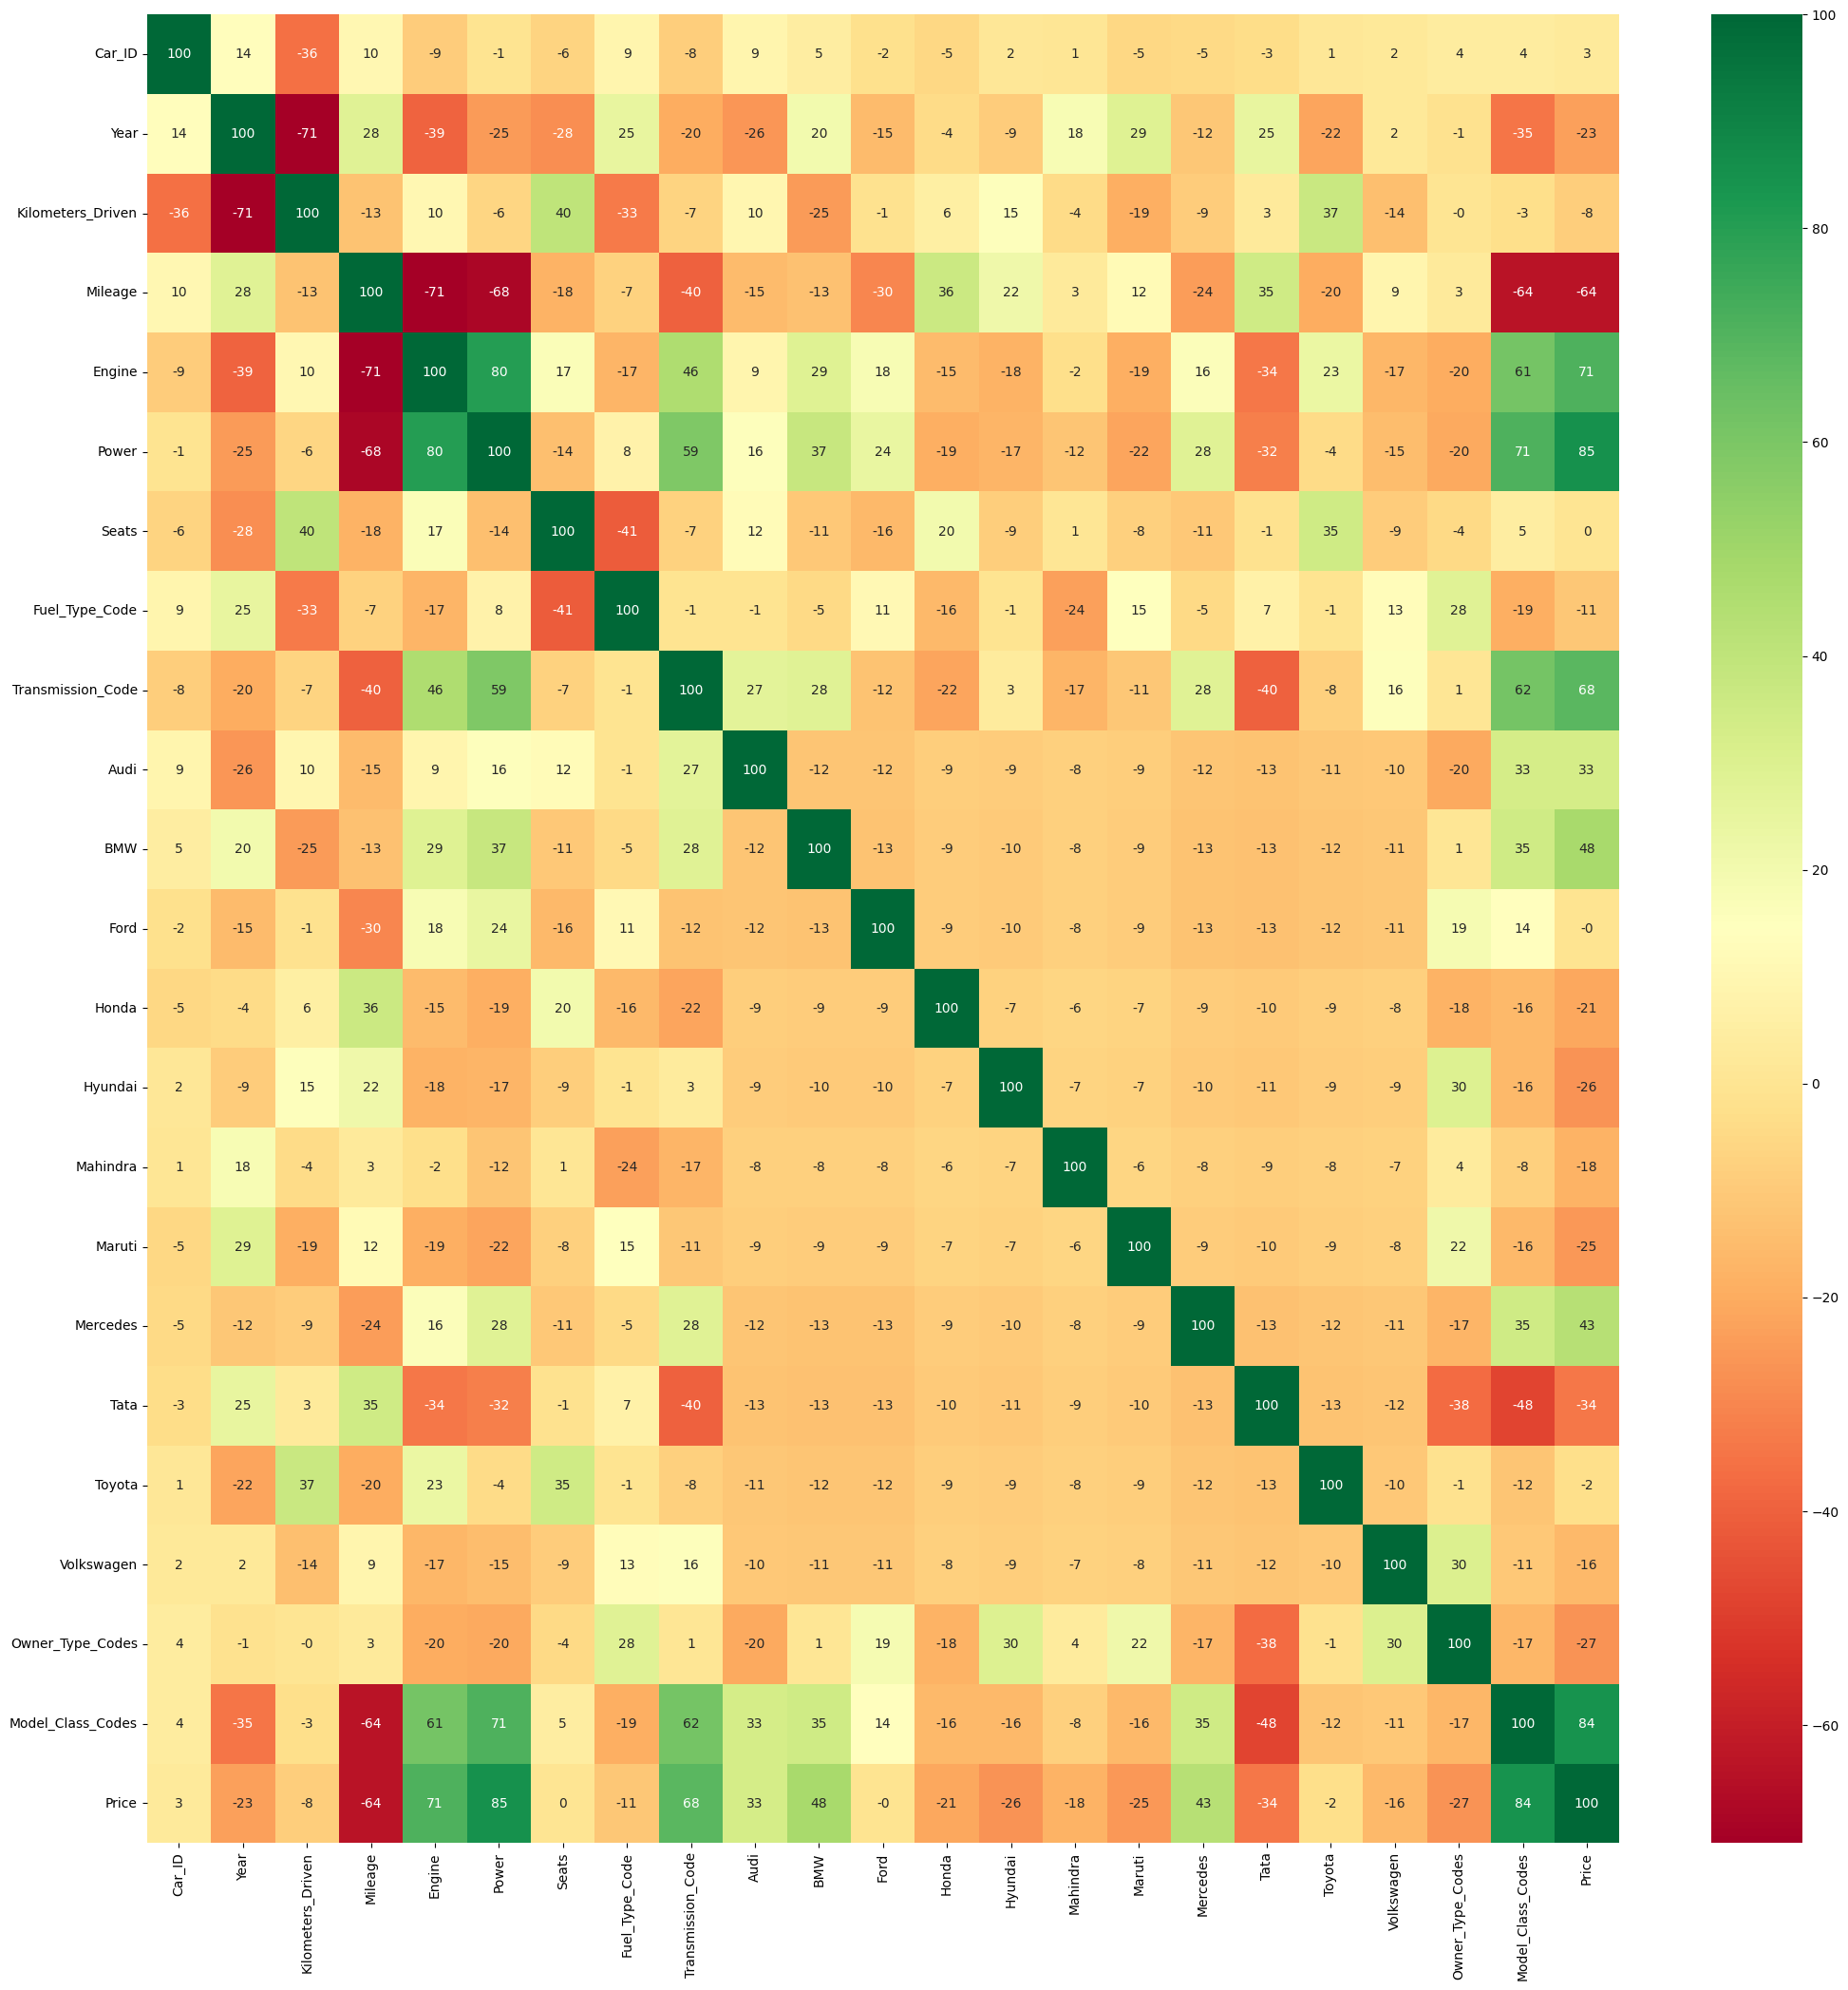

In [27]:
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Plot the heatmap
plt.figure(figsize = (25,25))
sns.heatmap(data = correlation_matrix*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

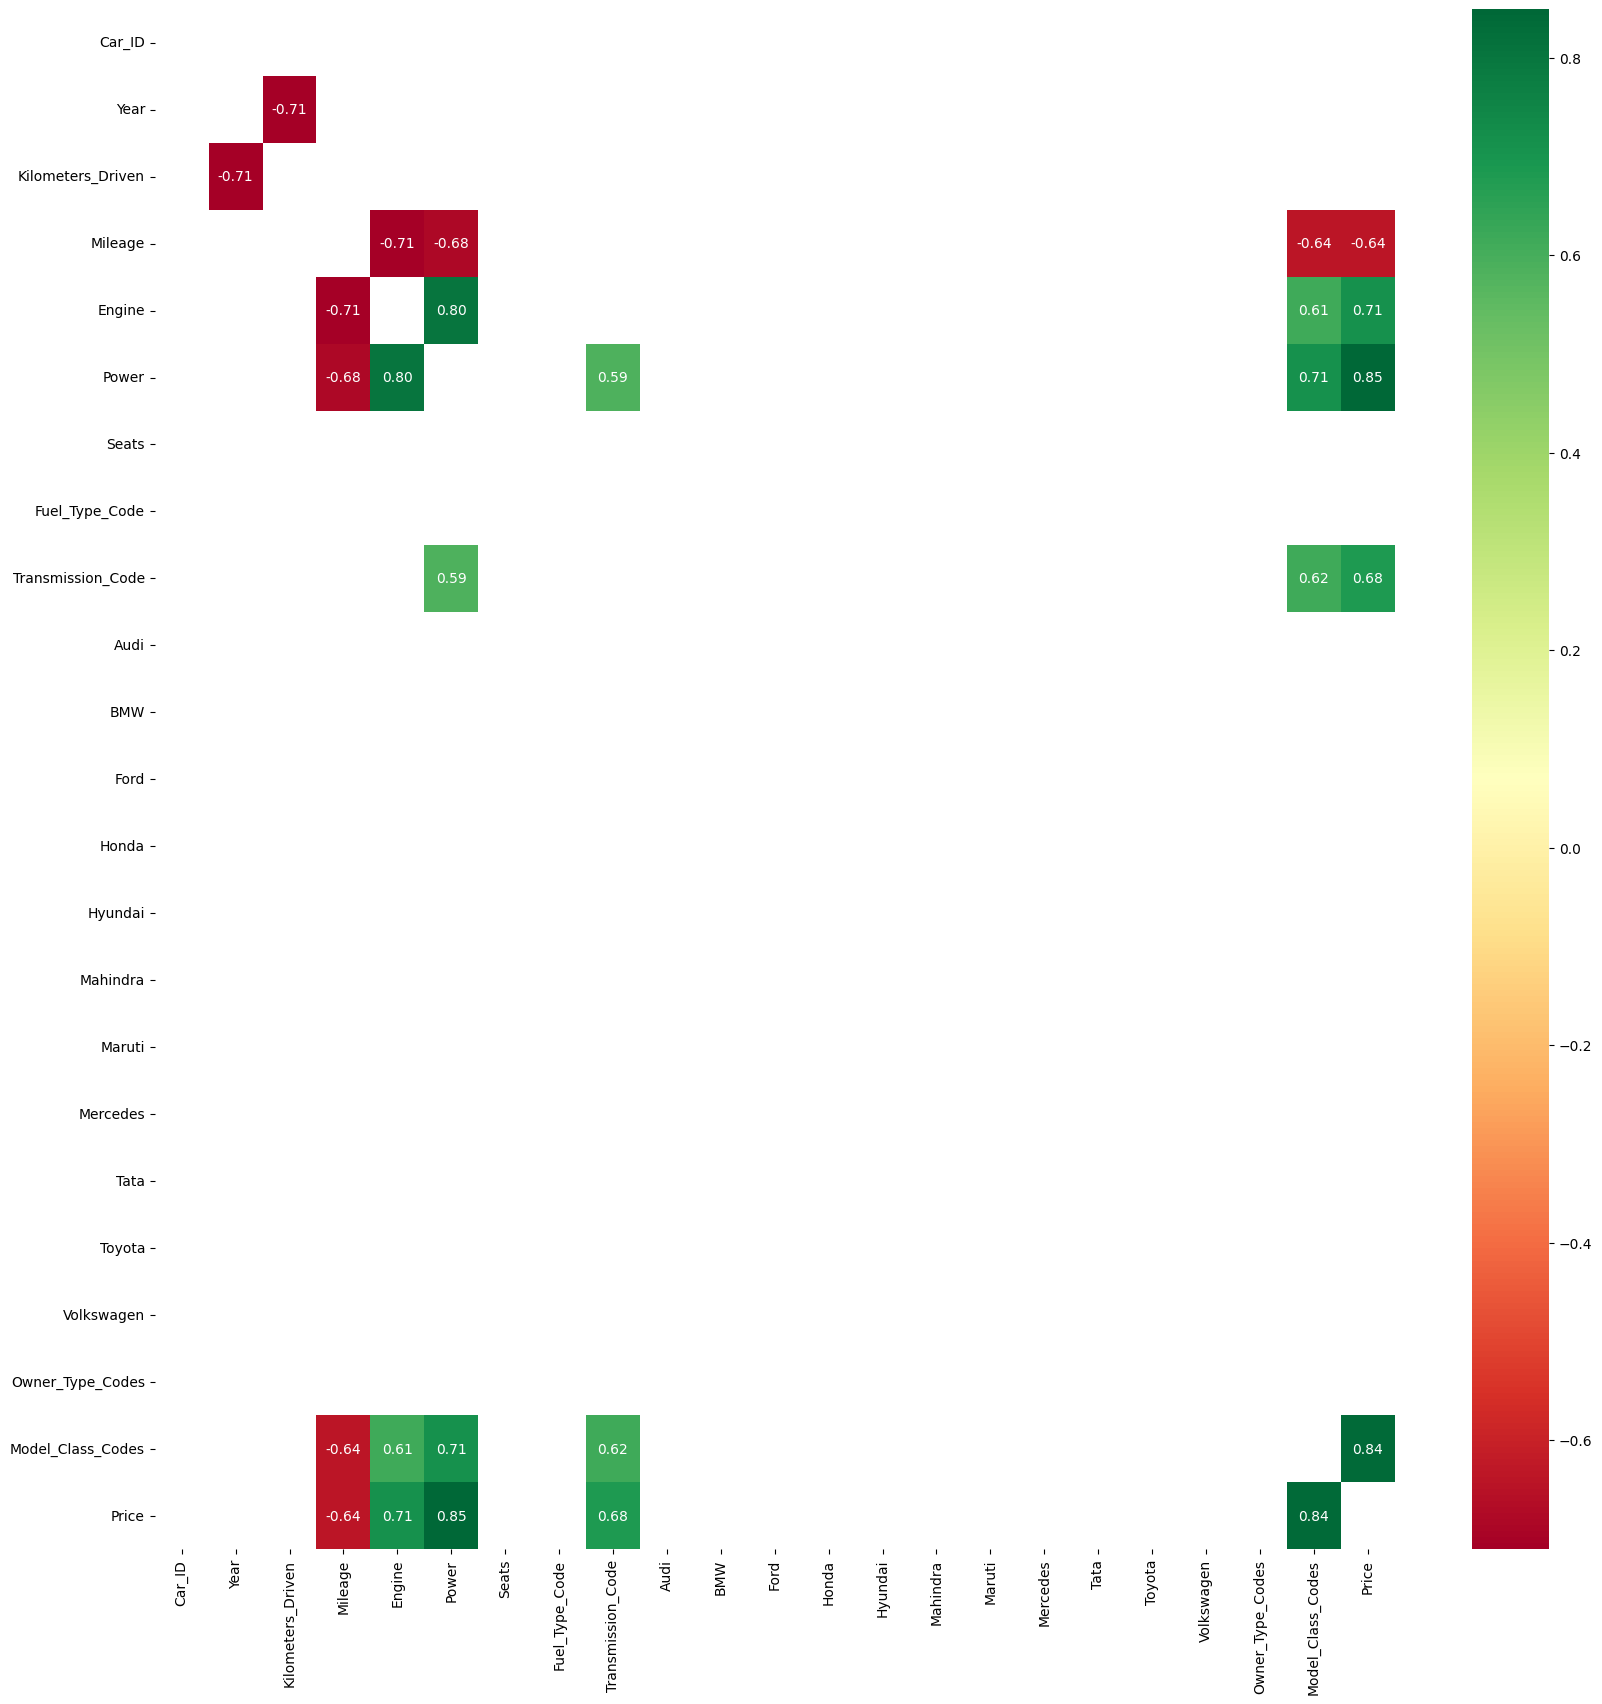

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(data = correlation_matrix[(abs(correlation_matrix) >= 0.5) & (correlation_matrix < 0.99) ], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

## Conclusion
Strong Positive Correlation:
- Power: A very strong positive correlation (0.85) with the price. This indicates that cars with more engine power tend to have higher prices.
- Engine: A moderate positive correlation (0.71) with the price, suggesting that larger engine sizes are associated with higher prices.
- Transmission_Code: A strong positive correlation (0.68) with price implies that the type of transmission significantly impacts the car’s price.
- Model_class_codes: A strong positive correlation with price, wich reflects quality of car
Negative Correlation:
- Mileage: A moderate negative correlation (-0.64) with the price. Cars with higher mileage (i.e., better fuel efficiency) are generally less expensive, possibly because they are older or designed for cost-efficiency.

# **Завдання 6**. 

Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [29]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
model = LinearRegression().fit(X_train, y_train)

In [32]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

loss_train = mean_squared_error(y_train, predictions_train)
print('Loss:', loss_train)

loss_test = mean_squared_error(y_test, predictions_test)
print('Loss:', loss_test)

Loss: 34946485069.2249
Loss: 67513828485.3809


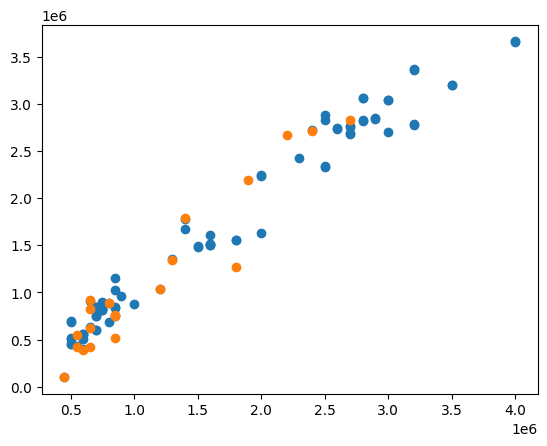

In [56]:
plt.scatter(y_train, predictions_train, label='train')
plt.scatter(y_test, predictions_test, label='test')

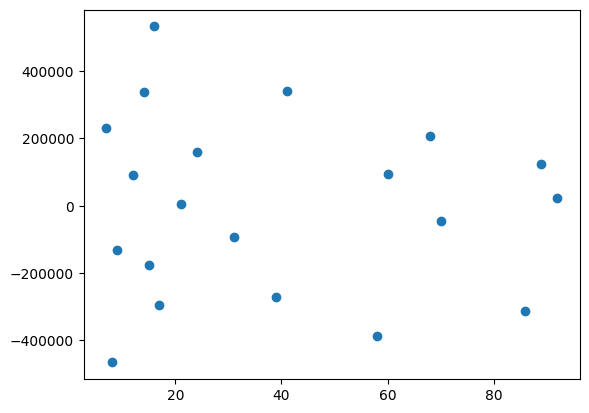

In [33]:
errors_test = y_test - predictions_test
plt.plot(errors_test, 'o');

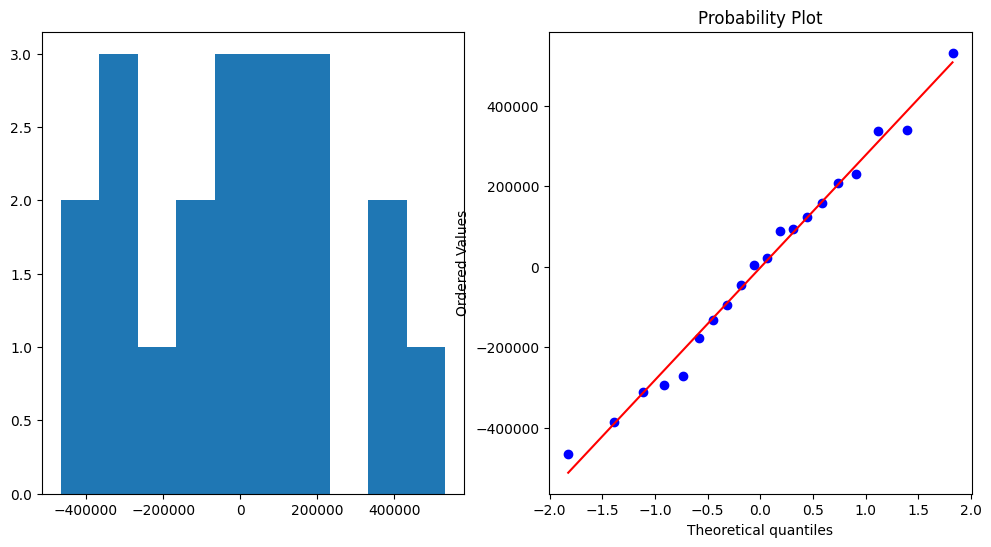

In [34]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors_test)
plt.subplot(1,2,2)
probplot(errors_test, dist='norm', plot=plt);

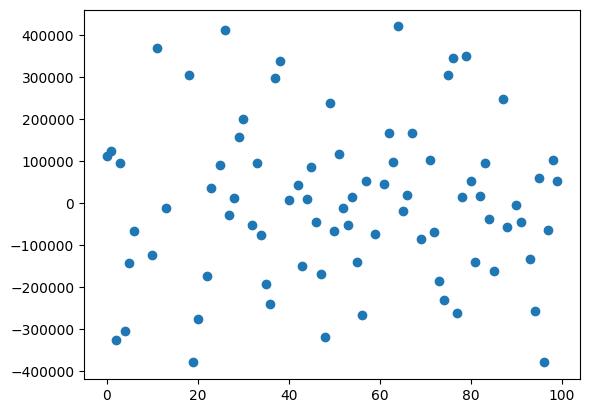

In [35]:
errors_train = y_train - predictions_train
plt.plot(errors_train, 'o');

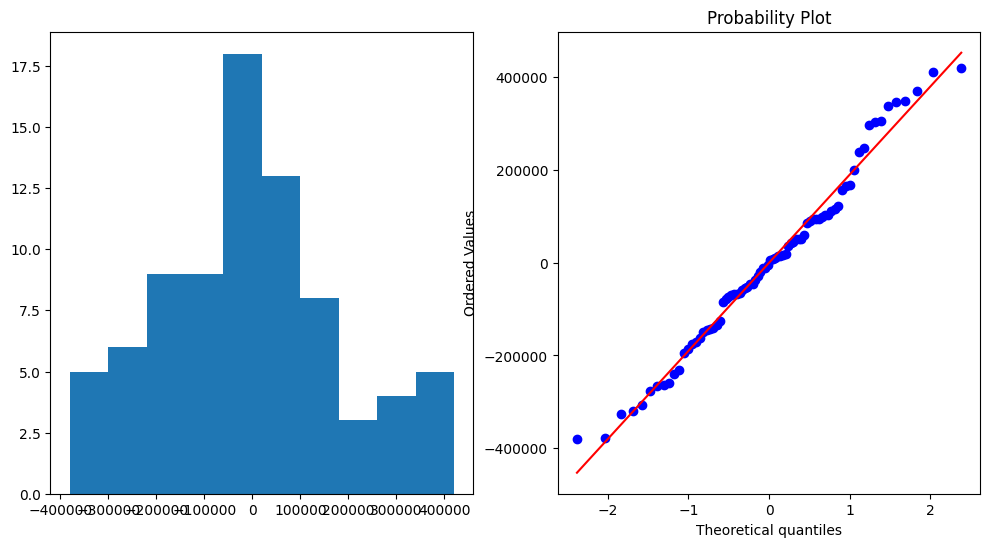

In [36]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors_train)
plt.subplot(1,2,2)
probplot(errors_train, dist='norm', plot=plt);

### Conclusion
 Residuals appear to be normally distributed and homoskedastic for the train and test datasets. The quality of the model can be considered good.

# **Завдання 7**. 
Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [38]:
scaled_X_train = scaler.transform(X_train)
scaled_X_train

array([[ 1.09092769,  0.56881254, -0.69387081, ...,  3.22932987,
         0.53530338,  0.97804983],
       [ 0.10038127, -0.32344242, -0.03953291, ..., -0.30966177,
        -0.99413485,  0.97804983],
       [-0.92554181, -0.32344242, -0.03953291, ..., -0.30966177,
        -0.99413485,  0.97804983],
       ...,
       [-1.63307497, -0.32344242,  1.81442446, ..., -0.30966177,
         0.53530338, -0.34811943],
       [-0.89016515,  0.56881254, -0.69387081, ..., -0.30966177,
         0.53530338,  0.97804983],
       [ 0.80791442,  0.56881254, -0.69387081, ..., -0.30966177,
        -0.99413485,  0.97804983]])

In [39]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = mean_squared_error(targets, predictions)
  print('Loss:', loss)
  return model

In [40]:
model = train_model_show_rmse(scaled_X_train, y_train)

Loss: 34946485069.224495


In [41]:
predictions_test = model.predict( scaler.transform(X_test))

In [42]:
loss_test = mean_squared_error(y_test, predictions_test)
print('Loss:', loss_test)

Loss: 67513828485.369896


In [43]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns.tolist(), 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

weights_df['weight_formatted'] = weights_df['weight'].map("{:,.2f}".format)

print(weights_df.sort_values('weight', ascending=False))

              feature        weight weight_formatted
22                  1  1.680000e+06     1,680,000.00
5               Power  4.525528e+05       452,552.79
21  Model_Class_Codes  2.277474e+05       227,747.44
16           Mercedes  1.900753e+05       190,075.30
9                Audi  1.865521e+05       186,552.11
10                BMW  1.571887e+05       157,188.73
20   Owner_Type_Codes  8.162570e+04        81,625.70
8   Transmission_Code  7.495738e+04        74,957.38
1                Year  7.172811e+04        71,728.11
18             Toyota  4.265062e+04        42,650.62
4              Engine  3.257069e+04        32,570.69
0              Car_ID -6.061225e+03        -6,061.23
6               Seats -1.371864e+04       -13,718.64
17               Tata -1.551373e+04       -15,513.73
2   Kilometers_Driven -4.310457e+04       -43,104.57
3             Mileage -4.571507e+04       -45,715.07
12              Honda -5.226797e+04       -52,267.97
19         Volkswagen -8.022936e+04       -80,

### Conclusion

Most Important Features for Car Price Prediction:

Top Positive Features (Increase Price):
- Intercept: Represents the baseline car price.
- Power: Higher engine power significantly increases price.
- Model_Class_Codes: represents the quality of the car.
- Mercedes, BMW, Audi: Luxury brands add substantial value.
- Transmission Code: Advanced transmission types boost price.

Top Negative Features (Decrease Price):
- Fuel Type Code: Cheaper fuel types reduce value.
- Hyundai, Mahindra: Lower perceived brand value decreases price.
- Mileage: High mileage significantly lowers the car’s value.
- Kilometers Driven: Greater usage reduces price.

Key Takeaway:

Luxury brands, engine power, and advanced features increase car prices, while higher usage and less premium brands reduce them.

# **Завдання 8.** 

На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [44]:
import statsmodels.api as sm

Y = y_train
X = scaled_X_train
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    1.680000e+06
x1      -6.061225e+03
x2       7.172811e+04
x3      -4.310457e+04
x4      -4.571507e+04
x5       3.257069e+04
x6       4.525528e+05
x7      -1.371864e+04
x8      -1.438021e+05
x9       7.495738e+04
x10      1.865521e+05
x11      1.571887e+05
x12     -1.287151e+05
x13     -5.226797e+04
x14     -1.439053e+05
x15     -1.406507e+05
x16     -1.190097e+05
x17      1.900753e+05
x18     -1.551373e+04
x19      4.265062e+04
x20     -8.022936e+04
x21      8.162570e+04
x22      2.277474e+05
dtype: float64

In [45]:
results_p_value_005 = results.pvalues<0.05
results_p_value_025 = results.pvalues<0.25

In [46]:
results_p_value_005

const     True
x1       False
x2       False
x3       False
x4       False
x5       False
x6        True
x7       False
x8        True
x9       False
x10       True
x11       True
x12       True
x13      False
x14       True
x15       True
x16       True
x17       True
x18      False
x19      False
x20       True
x21      False
x22       True
dtype: bool

In [47]:
columns = pd.DataFrame(X_train.columns)
columns

,0
0,Car_ID
1,Year
2,Kilometers_Driven
3,Mileage
4,Engine
5,Power
6,Seats
7,Fuel_Type_Code
8,Transmission_Code
9,Audi


In [48]:
filtered_columns = columns[1:][results_p_value_005[2:].values]

In [49]:
filtered_columns

,0
5,Power
7,Fuel_Type_Code
9,Audi
10,BMW
11,Ford
13,Hyundai
14,Mahindra
15,Maruti
16,Mercedes
19,Volkswagen


In [50]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     81.72
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.99e-35
Time:                        15:45:10   Log-Likelihood:                -1084.6
No. Observations:                  80   AIC:                             2213.
Df Residuals:                      58   BIC:                             2266.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.45e+04     68.442      0.0

### Conclusion
 Columns Const, Power, Fuel_Type_Code, Transmission_Code, Audi, BMW, Ford, Hyundai, Mahindra, Maruti, Mercedes, Volkswagen and Model_Class_Codes have p-values less than 0.05, so we can definitely use them in regression.

# **Завдання 9**. 
Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [51]:
scaled_X_train_filtered_005 = scaled_X_train[:,results_p_value_005[1:]]

Y = y_train
X = scaled_X_train_filtered_005
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    1.680000e+06
x1       5.056115e+05
x2      -8.384202e+04
x3       2.016791e+05
x4       2.333895e+05
x5      -9.200021e+04
x6      -9.998029e+04
x7      -8.966331e+04
x8      -5.669333e+04
x9       2.324635e+05
x10     -9.701531e+03
x11      2.464809e+05
dtype: float64

In [52]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     118.7
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           6.90e-40
Time:                        15:49:42   Log-Likelihood:                -1101.2
No. Observations:                  80   AIC:                             2226.
Df Residuals:                      68   BIC:                             2255.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.79e+04     60.237      0.0

### Conclusion
R2 і Adj. R-squared slightly decreased compared to previous version of model

# **Завдання 10**. 
Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [53]:
scaled_X_train_filtered_025 = scaled_X_train[:,results_p_value_025[1:]]

Y = y_train
X = scaled_X_train_filtered_025
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    1.680000e+06
x1       9.746663e+04
x2       4.972132e+05
x3      -1.334617e+05
x4       7.306007e+04
x5       2.089337e+05
x6       1.848077e+05
x7      -8.948649e+04
x8      -4.414184e+04
x9      -1.261379e+05
x10     -1.177826e+05
x11     -9.441433e+04
x12      2.225075e+05
x13      7.403659e+04
x14     -4.858456e+04
x15      7.344182e+04
x16      2.469239e+05
dtype: float64

In [54]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           5.81e-40
Time:                        15:50:09   Log-Likelihood:                -1086.1
No. Observations:                  80   AIC:                             2206.
Df Residuals:                      63   BIC:                             2247.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06    2.4e+04     69.999      0.0

### Conclusion
R-squared is almost the same — 0.966 compared to 0.967 (of the initial model), but Adj. R-squared improved from 0.955 to 0.957. Additionally, the F-statistic is higher: 112.00 compared to 81.72 (of the initial model).

Therefore, we can choose the third model.

### Conclusion 2
By the way, the column `Model_Class_Codes` improved the quality of the model (R-squared increased to 0.958)!